# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

In [4]:
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

text  Compound  Positive  \
0  PayPal will now allow users outside the U.S. t...    0.4215     0.098   
1  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019     0.080   
2  A recently-installed Bitcoin ATM.\r\n\n \n\n A...    0.1779     0.052   
3  Retailers are increasingly accepting cryptocur...    0.6187     0.153   
4  The government of El Salvador purchased at lea...    0.1280     0.046   

   Negative  Neutral  
0       0.0    0.902  
1       0.0    0.920  
2       0.0    0.948  
3       0.0    0.847  
4       0.0    0.954

In [8]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

text  Compound  Positive  \
0  As the broader crypto world enjoys a late summ...    0.7351     0.167   
1  PayPal will now allow users outside the U.S. t...    0.4215     0.098   
2  After the bell today, Coinbase reported anothe...    0.5719     0.139   
3  PayPal is bringing the ability to buy, hold an...    0.6908     0.161   
4  One of the most unusual cryptocurrency heists ...   -0.1027     0.000   

   Negative  Neutral  
0     0.000    0.833  
1     0.000    0.902  
2     0.000    0.861  
3     0.000    0.839  
4     0.043    0.957

In [9]:
# Describe the Bitcoin Sentiment
btc.describe()

Compound   Positive   Negative    Neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.157615   0.066200   0.032000   0.901800
std     0.394437   0.048477   0.067198   0.062426
min    -0.886000   0.000000   0.000000   0.729000
25%     0.038700   0.047500   0.000000   0.869250
50%     0.152950   0.052500   0.000000   0.907000
75%     0.421500   0.095250   0.043000   0.948750
max     0.690800   0.161000   0.271000   1.000000

In [10]:
# Describe the Ethereum Sentiment
eth.describe()

Compound   Positive   Negative   Neutral
count  20.000000  20.000000  20.000000  20.00000
mean    0.208305   0.065700   0.013200   0.92105
std     0.322790   0.056003   0.028787   0.05139
min    -0.440400   0.000000   0.000000   0.83300
25%     0.000000   0.000000   0.000000   0.89250
50%     0.226300   0.062000   0.000000   0.92250
75%     0.445000   0.095000   0.000000   0.95250
max     0.735100   0.167000   0.094000   1.00000

### Questions:

**Important note:** The sample answers may vary depending on when this code is running since news may change over time.

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest Positive score

---

## 2. Natural Language Processing
---
###   Tokenize

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word,
2. Remove punctuation.
3. Remove stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [14]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

text  Compound  Positive  \
0  PayPal will now allow users outside the U.S. t...    0.4215     0.098   
1  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019     0.080   
2  A recently-installed Bitcoin ATM.\r\n\n \n\n A...    0.1779     0.052   
3  Retailers are increasingly accepting cryptocur...    0.6187     0.153   
4  The government of El Salvador purchased at lea...    0.1280     0.046   

   Negative  Neutral                                             tokens  
0       0.0    0.902  [PayPal, allow, user, outside, U.S., buy, hold...  
1       0.0    0.920  [Photo, Joe, Raedle/Getty, Images, Twitter, Sq...  
2       0.0    0.948  [recently-installed, Bitcoin, ATM, today, Bitc...  
3       0.0    0.847  [Retailers, increasingly, accepting, cryptocur...  
4       0.0    0.954  [government, El, Salvador, purchased, least, 2...

In [15]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

text  Compound  Positive  \
0  As the broader crypto world enjoys a late summ...    0.7351     0.167   
1  PayPal will now allow users outside the U.S. t...    0.4215     0.098   
2  After the bell today, Coinbase reported anothe...    0.5719     0.139   
3  PayPal is bringing the ability to buy, hold an...    0.6908     0.161   
4  One of the most unusual cryptocurrency heists ...   -0.1027     0.000   

   Negative  Neutral                                             tokens  
0     0.000    0.833  [broader, crypto, world, enjoys, late, summer,...  
1     0.000    0.902  [PayPal, allow, user, outside, U.S., buy, hold...  
2     0.000    0.861  [bell, today, Coinbase, reported, another, per...  
3     0.000    0.839  [PayPal, bringing, ability, buy, hold, sell, c...  
4     0.043    0.957  [One, unusual, cryptocurrency, heist, recent, ...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('El', 'Salvador'), 7),
 (('buy', 'hold'), 3),
 (('hold', 'sell'), 3),
 (('Central', 'American'), 3),
 (('American', 'country'), 3),
 (('became', 'first'), 3),
 (('PayPal', 'allow'), 2),
 (('allow', 'user'), 2),
 (('first', 'time'), 2),
 (('allow', 'customer'), 2),
 (('char', 'PayPal'), 2),
 (('sell', 'cryptocurrencies'), 2),
 (('char', 'Joe'), 2),
 (('Joe', 'TidyCyber'), 2),
 (('TidyCyber', 'reporter'), 2),
 (('New', 'York'), 2),
 (('Photo/File', 'Photo/File'), 2),
 (('27', 'Reuters'), 2),
 (('Reuters', 'first'), 2),
 (('first', 'cryptocurrency'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'PayPal'), 3),
 (('first', 'time'), 3),
 (('ether', 'burned'), 3),
 (('buy', 'hold'), 2),
 (('hold', 'sell'), 2),
 (('cryptocurrency', 'heist'), 2),
 (('Vitalik', 'Buterin'), 2),
 (('bitcoin', 'ethereum'), 2),
 (('144', 'million'), 2),
 (('million', 'worth'), 2),
 (('worth', 'ether'), 2),
 (('burned', 'since'), 2),
 (('since', 'overhaul'), 2),
 (('overhaul', 'fee'), 2),
 (('fee', 'system'), 2),
 (('ethereum', 'network'), 2),
 (('Solana', 'SOL'), 2),
 (('NEW', 'YORK'), 2),
 (('YORK', 'Sept'), 2),
 (('broader', 'crypto'), 1)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 18),
 ('cryptocurrency', 11),
 ('El', 10),
 ('first', 7),
 ('Bitcoin', 7),
 ('Salvador', 7),
 ('bitcoin', 7),
 ('country', 6),
 ('allow', 4),
 ('customer', 4)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('cryptocurrency', 6),
 ('ethereum', 5),
 ('crypto', 4),
 ('PayPal', 4),
 ('first', 4),
 ('launched', 4),
 ('Images', 4),
 ('Ethereum', 4),
 ('bitcoin', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

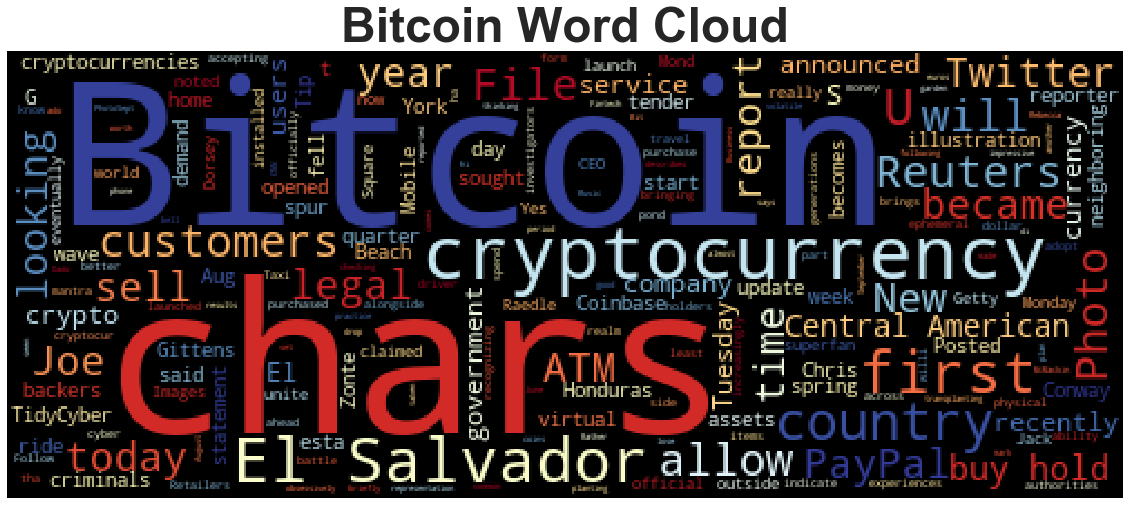

In [24]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

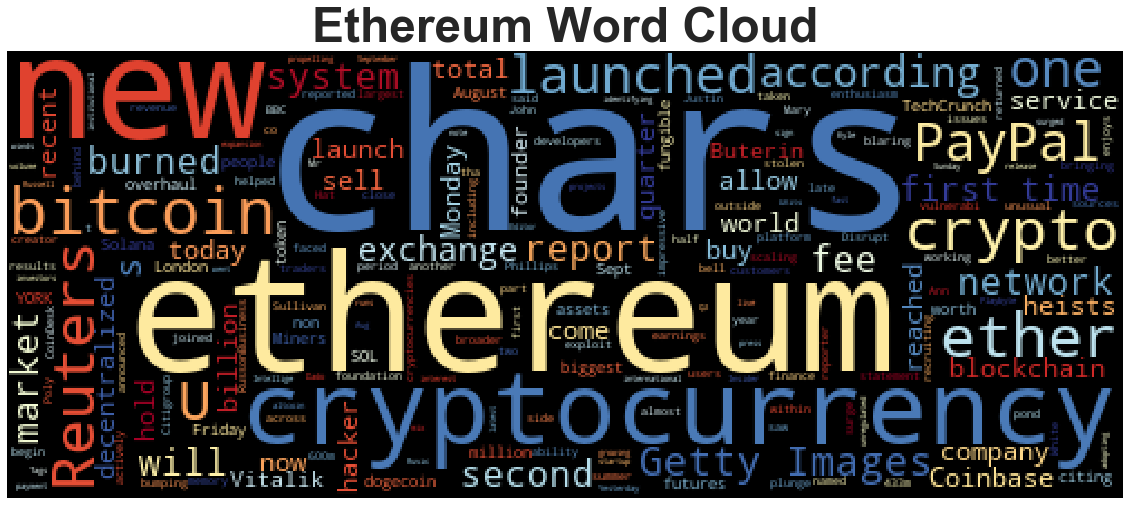

In [25]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy if needed
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]The government of El Salvador purchased at least 200 bitcoin recently, ahead of the country officially recognizing bitcoin as a f

In [30]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

PayPal ORG
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Joe Raedle/ PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Bitcoin ATM ORG
today DATE
El Salvador GPE
US GPE
Central American NORP
first ORDINAL
El Salvador GPE
at least 200 CARDINAL
Tuesday DATE
a year DATE
US GPE
Joe TidyCyber PERSON
Joe PERSON
TidyCyber reporter MONEY
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
chars]New York GPE
CNN ORG
a volatile day DATE
about 10% PERCENT
Tuesday DATE
$43,000 mark MONEY
El Salvador GPE
June DATE
chars]8 ORG
just days DATE
September DATE
spring DATE
Rebecca McMackin PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo/File Photo/File Photo/File PhotoSept 7 ORG
Reuters ORG
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
UK GPE
first ORDINAL
four CARDINAL
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
27 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DA

---

### Ethereum NER

In [33]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

"As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after it launched in the US. In a statement, the company said tha… [+850 chars]One of the most unusual cryptocurrency heists in recent memory has come to a close. On Monday, Poly Network, a decentralized finance platform 

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

late summer DATE
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
a year DATE
US GPE
Monday DATE
Poly Network ORG
White PERSON
chars]Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
Sullivan/Getty Images
Citigroup ORG
CoinDesk PRODUCT
two CARDINAL
one CARDINAL
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
25 CARDINAL
Reuters ORG
September DATE
chars]More than $144 million MONEY
August 5 DATE
Sunday DATE
over 45,799 CARDINAL
second ORDINAL
Dado Ruvic PERSON
Reuters ORG
More than $144 million MONEY
above $100 MONEY
first ORDINAL
Monday DATE
more than 200% PERCENT
August DATE
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
Kyle Russell PERSON
Playbyte ORG
Last Friday DATE
Dom Hofmann PERSON
one CARDINAL
Rosenfeld PERSON
FTX ORG
500 MONEY
NFT ORG
Tuesday DATE
Solana PERSON
seventh ORDINAL
Dogecoin